**Exploratory Data Analysis**

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 23, Finished, Available, Finished)

*Load silver data*

In [22]:
df = spark.sql("SELECT * FROM LH_TELCO.silver_telco_churn")
df = df.toPandas()
df.head()

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 24, Finished, Available, Finished)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,9000-PLFUZ,Female,Yes,Yes,No,60,No,No phone service,DSL,No,...,No,Yes,Yes,Two year,Yes,Credit card (automatic),49.45,2907.55,No,48+
1,3427-GGZZI,Female,No,Yes,No,19,Yes,Yes,Fiber optic,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,89.10,1620.80,No,12-24
2,7779-ORAEL,Male,Yes,Yes,No,45,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Two year,No,Credit card (automatic),75.15,3480.35,No,24-48
3,0644-OQMDK,Male,Yes,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.65,293.85,No,0-12
4,4077-CROMM,Female,No,Yes,Yes,31,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.20,3243.45,Yes,24-48


*General Information*

In [23]:
print(df.shape)
df.info()

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 25, Finished, Available, Finished)

(7043, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int32  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [24]:
df.isnull().mean().sort_values(ascending=False)

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 26, Finished, Available, Finished)

customerID          0.0
gender              0.0
Churn               0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
DeviceProtection    0.0
OnlineBackup        0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
tenure_group        0.0
dtype: float64

We see that the dataset is cleaned already.

*Visualize Data Distributions*

Here we will plot histograms to understand the distribution of numerical features in the dataset.

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 27, Finished, Available, Finished)

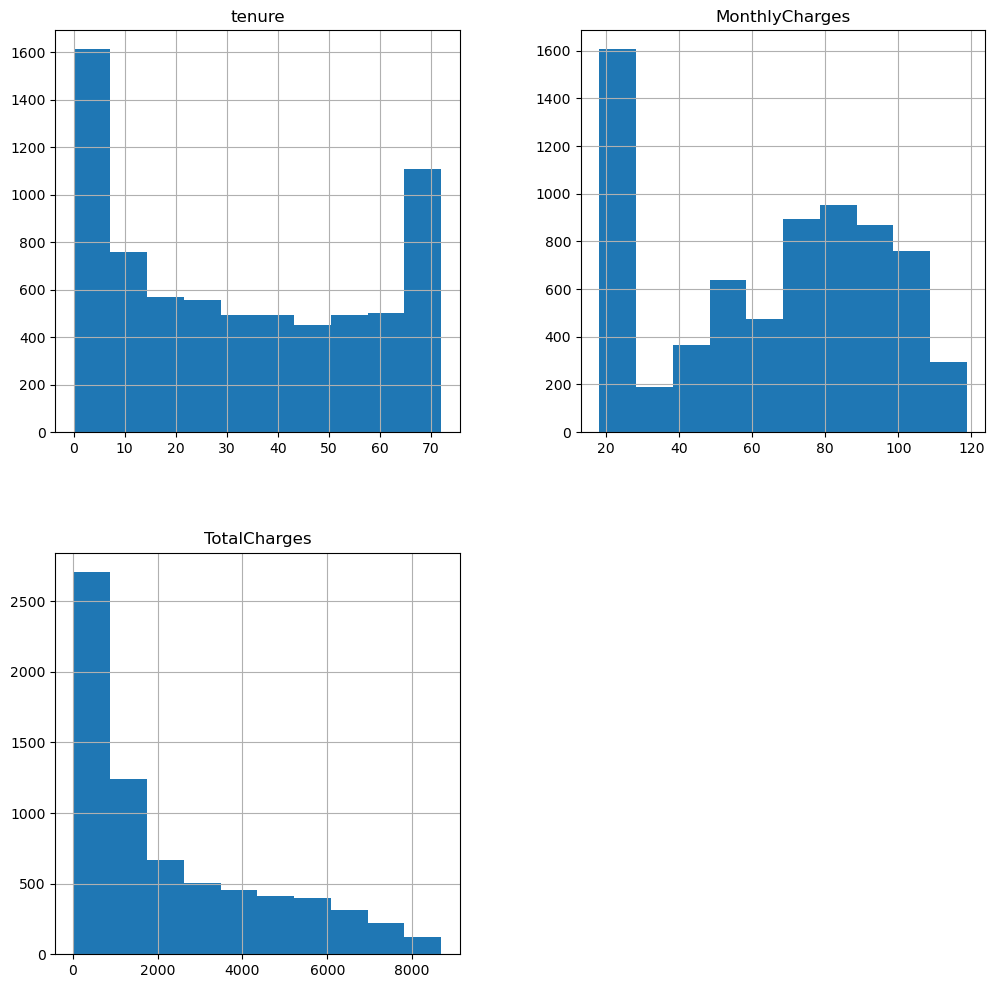

In [25]:
df.hist(figsize=(12,12))
plt.show()

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 28, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


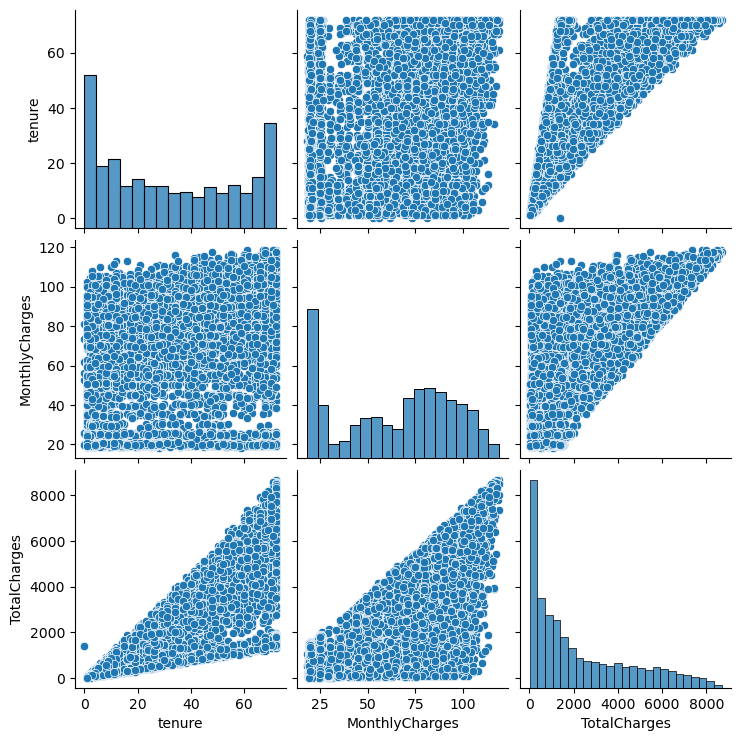

In [26]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
plt.show()

- TotalCharges is strongly driven by tenure, showing a clear linear relationship — long-standing customers naturally accumulate higher total payments.
- MonthlyCharges varies independently from tenure, meaning the monthly fees customers pay do not depend on how long they’ve been with the company.

*Churn Analysis*

Here we will analyze which features have the most significant impact on churn, such as 'Contract', 'MonthlyCharges' and 'tenure'.

In [27]:
df.columns

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 29, Finished, Available, Finished)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 30, Finished, Available, Finished)

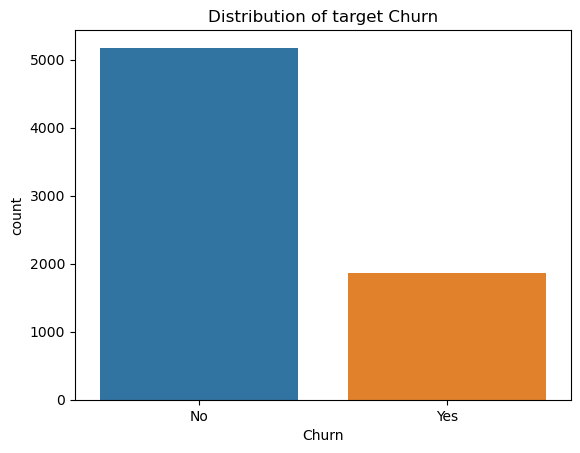

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [28]:
sns.countplot(x='Churn', data=df)
plt.title("Distribution of target Churn")
plt.show()

df['Churn'].value_counts(normalize=True)

AutoML is going to rebalance if necessary

*Churn by key business drivers (EDA for decision-making)*

Contract Type

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 31, Finished, Available, Finished)

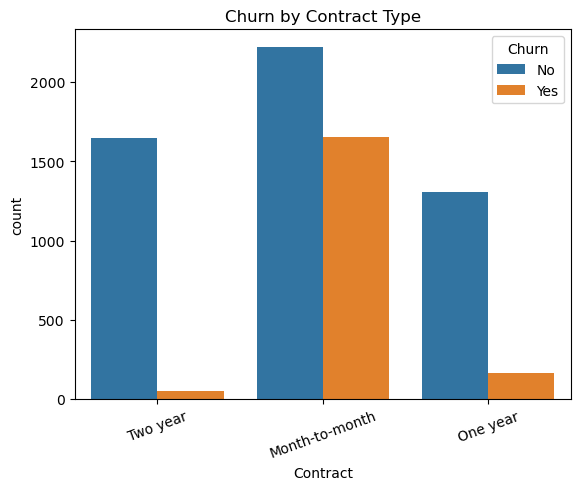

In [29]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()

Insight:

Churn is significantly higher among Month-to-month customers.

One-year and Two-year contracts show much lower churn.
This is a strong business driver and a key feature to include in Gold.

Internet Service

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 32, Finished, Available, Finished)

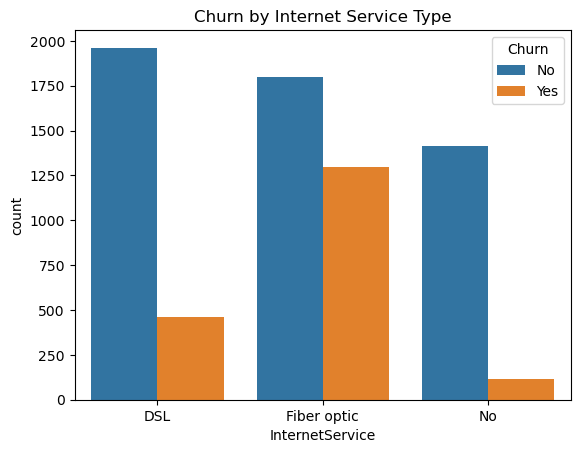

In [30]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service Type")
plt.show()

Insight:

Customers using Fiber optic churn at much higher rates.

DSL and "No internet" users churn far less.
This suggests service quality or expectations strongly affect churn.

Tech Support

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 33, Finished, Available, Finished)

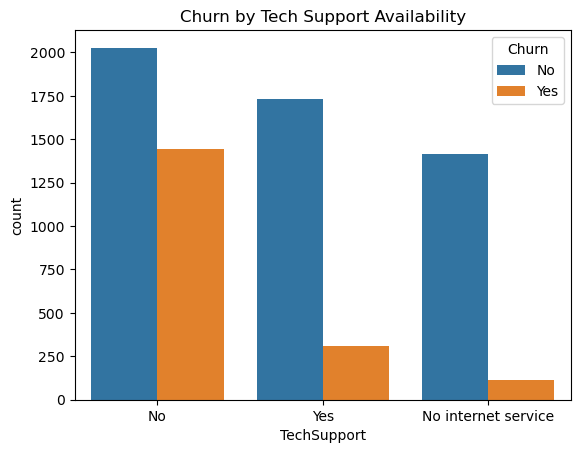

In [31]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Churn by Tech Support Availability")
plt.show()

Insight:

Customers without Tech Support churn significantly more.

This is logical: lack of assistance often leads to frustration → churn.
Very useful predictor for the model.

Paperless Billing

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 34, Finished, Available, Finished)

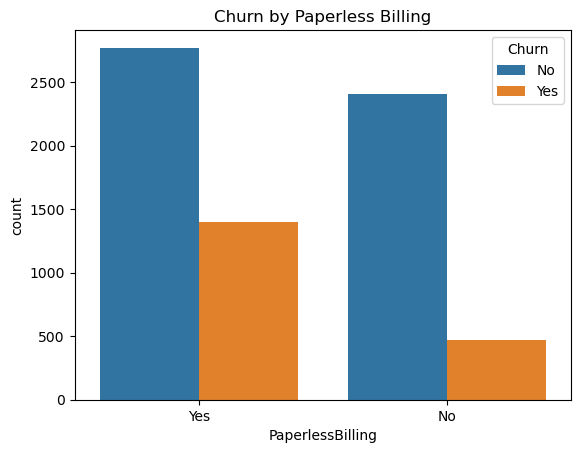

In [32]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title("Churn by Paperless Billing")
plt.show()

Insight:

PaperlessBilling = “Yes” is associated with higher churn.

Likely correlated with electronic check payments (which also show higher churn in this dataset).
A subtle but valuable feature for ML.

Tenure analysis — foundational feature engineering

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 35, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


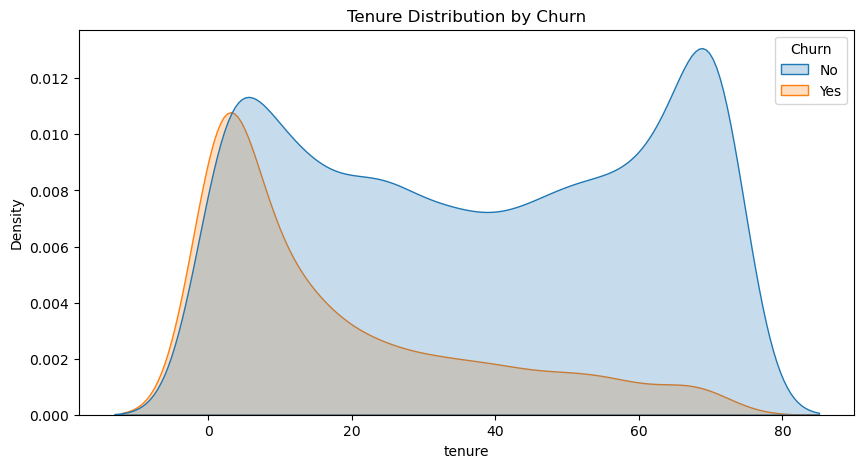

In [33]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True)
plt.title("Tenure Distribution by Churn")
plt.show()

Insight:

Customers who churn tend to have very low tenure.

Long-tenure customers are more loyal and churn much less.

*Final feature review before generating Gold*

In [34]:
df.columns

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 36, Finished, Available, Finished)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_group'],
      dtype='object')

Keep variables directly relevant for churn prediction (services, contract types, billing, demographics).

Drop internal dummy columns created temporarily in notebooks.

Retain customerID only as a reference (AutoML can ignore it as a feature).

*Saving Gold Table to LH*

In [35]:
# Creating spark df from final pandas df
df_spark = spark.createDataFrame(df)
# Saving it into the LH
df_spark.write.mode("overwrite").format("delta").saveAsTable("gold_telco_churn")

StatementMeta(, 993c54f9-f589-4cd7-9da8-7b31c43eece8, 37, Finished, Available, Finished)